In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
plt.style.use('fivethirtyeight') 
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.grid'] =False
plt.rcParams['figure.facecolor']='white'

Read the files as pandas dataframes

In [10]:
file_root = '/Users/eric/Desktop/doxcsv'
users = pd.read_csv(file_root+'/users.csv')
titles = pd.read_csv(file_root+'/titles.csv')
internal_profile_views = pd.read_csv(file_root+'/internal_profile_views.csv')
external_profile_views = pd.read_csv(file_root+'/external_profile_views.csv')
user_profile_urls = pd.read_csv(file_root+'/user_profile_urls.csv')

In [12]:
# replace empty strings with np.nan to make them easier to handle for Pandas
users = users.replace('', np.nan, regex=True)

# Convert to appropriate data types
users['id'] = users.id.astype(int)
users['age'] = users.age.astype(int)
users['title_id'] = users.title_id.astype(int)

# Look up title_ids from titles
users = pd.merge(users, titles, how='inner', left_on=['title_id'], right_on=['id'], suffixes=('', '_y')).drop(['title_id', 'id_y'], axis=1)

##### Internal profile views

In [14]:
# Denormalize all users for the internal profile views
t = pd.merge(internal_profile_views, users, how='inner', left_on=['user_id'], right_on=['id'], suffixes=('', '_y')).drop('id_y', axis=1)
denom_internal_views = pd.merge(t, users, how='inner', left_on=['viewed_user_id'], right_on=['id'], suffixes=('', '_v')).drop('id_v', axis=1)

In [15]:
denom_internal_views

,id,user_id,viewed_user_id,created_at,firstname,lastname,age,region,title,firstname_v,lastname_v,age_v,region_v,title_v
0,6997,10056,2202188,2014-01-01 12:11:09,Patti,Pistilli,30,West,Other,Rosemarie,Carr,24,Other,Postdoctoral assistant
1,3177,10112,116842,2014-01-01 18:56:17,Carlos,Gonzales,30,South,Postdoctoral assistant,Philip,Jones,32,Midwest,Full professor
2,2606,72342,116842,2014-01-01 15:50:32,Eric,Bowman,26,Midwest,Postdoctoral assistant,Philip,Jones,32,Midwest,Full professor
3,1239,75000,116842,2014-01-01 08:05:32,Mary,Weeks,50,South,Student,Philip,Jones,32,Midwest,Full professor
4,2325,146653,116842,2014-01-01 14:12:44,Diane,Owen,24,Northeast,Student,Philip,Jones,32,Midwest,Full professor
5,260,788522,116842,2014-01-01 02:40:45,Ronnie,Morrow,48,South,Postdoctoral assistant,Philip,Jones,32,Midwest,Full professor
6,2026,818241,116842,2014-01-01 12:34:40,Kelly,Ryan,26,Northeast,Student,Philip,Jones,32,Midwest,Full professor
7,1849,1052632,116842,2014-01-01 11:36:02,Louise,Richardson,62,South,Postdoctoral assistant,Philip,Jones,32,Midwest,Full professor
8,3842,1293089,116842,2014-01-01 22:35:41,Curtis,Barnes,27,Northeast,Student,Philip,Jones,32,Midwest,Full professor
9,3846,1331121,116842,2014-01-01 22:37:14,Earlene,Macareno,51,South,Student,Philip,Jones,32,Midwest,Full professor


### Exploratory Plots

Understanding user demographics

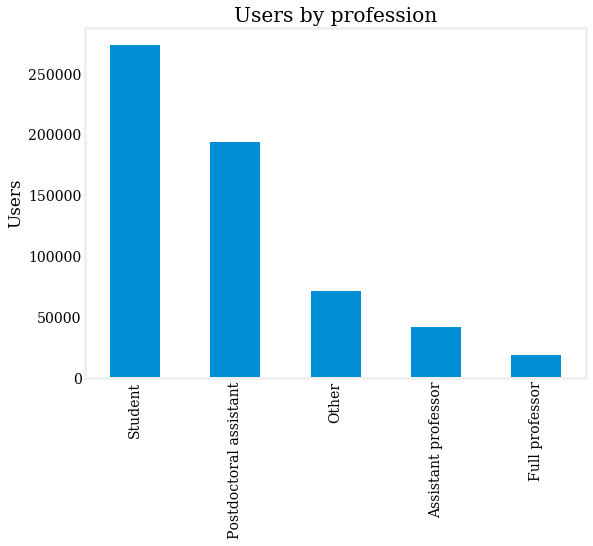

In [21]:
# Plot users by titles
ax = users['title'].value_counts().plot('bar')
ax.set(ylabel='Users', title='Users by profession');

[Text(0,0.5,u'Distribution'),
 Text(0.5,0,u'Age'),
 Text(0.5,1,u'Age Distribution')]

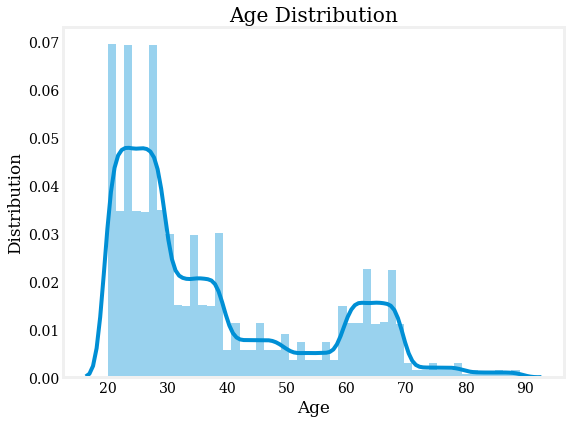

In [19]:
ax2 = sns.distplot(users.age)
ax2.set(xlabel='Age', ylabel='Distribution', title='Age Distribution')

[Text(0.5,0,u'Region'), Text(0.5,1,u'Users by Region')]

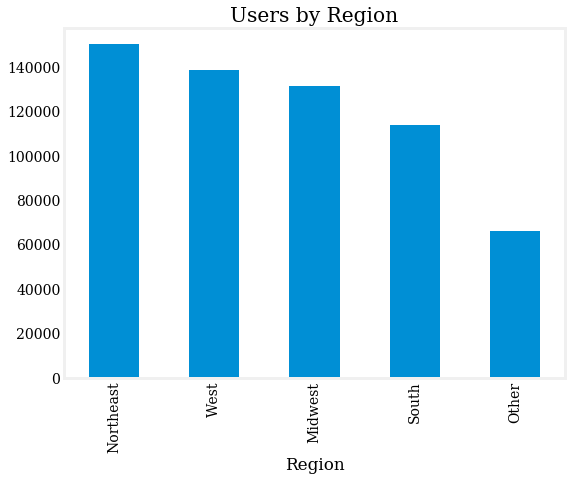

In [7]:
ax3 = users['region'].value_counts().plot('bar')
ax3.set(xlabel='Region', title='Users by Region')

[Text(0.5,0,u'Region'), Text(0.5,1,u'Viewed users by Title')]

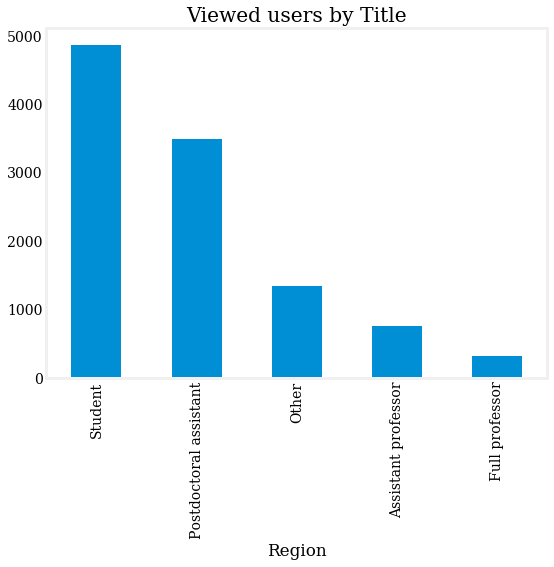

In [26]:
ax3 = denom_internal_views['title'].value_counts().plot('bar')
ax3.set(xlabel='Region', title='Viewed users by Title')

### Internal profile views by occupation

In [8]:
# Popularity of occupations within the social network

occuaption_tmp = denom_internal_views.copy()

#occuaption_tmp.title_v = occuaption_tmp.title_v.map(lambda x: 'viewed '+x)
occuaption_tmp = occuaption_tmp.rename(columns = {'title': 'viewer', 'title_v':'viewed'})
occupation_corr = occuaption_tmp.pivot_table(index='viewer',columns='viewed', values='id', aggfunc='count')
                
occupation_corr

viewed,Assistant professor,Full professor,Other,Postdoctoral assistant,Student
viewer,,,,,
Assistant professor,42,325,50,139,208
Full professor,22,128,16,74,84
Other,95,548,87,269,343
Postdoctoral assistant,241,1395,226,707,933
Student,338,1914,338,929,1355


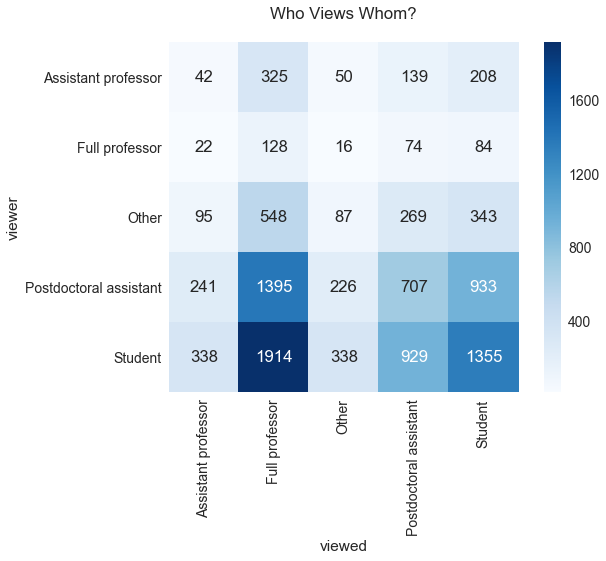

In [9]:
sns.set(font_scale=1.4)
ax4 = sns.heatmap(occupation_corr, square=True, annot=True, fmt='d', cmap='Blues')
ax4.set(title='Who views whom?\n'.title());
plt.gcf().set_size_inches((8,6))

##### From the above, students view Full professors the most, and they are the most popular. This is followed by the students viewing each other.

### Analyze internal users profile views

In [10]:
# Total internal visits for each user id
internal_visits_t = pd.DataFrame({'internal_profile_visits' : internal_profile_views.groupby( ["viewed_user_id"] ).size()}).reset_index() \
             .rename(columns = {'viewed_user_id': 'user_id'})
internal_visits = pd.merge(internal_visits_t, user_profile_urls,).drop('id', axis = 1)

In [11]:
# Number of users whose profiles have internal views, how many people had visitors
len(internal_visits.user_id)

5464

In [12]:
# total users in the network
len(users.id)

600000

In [13]:
len(internal_visits.user_id) / float(len(users.id)) * 100

0.9106666666666667

##### Only 5464 of 600,000 users are viewed internally, which is 0.9% of total users

In [14]:
# Lets find out who are these 5464 users
internal_visits_users = pd.merge(internal_visits, users, how = 'inner', left_on = 'user_id', right_on= 'id').drop('id', axis=1)

[Text(0.5,0,u'Occupation'),
 Text(0.5,1,u'Internally popular users by occupation')]

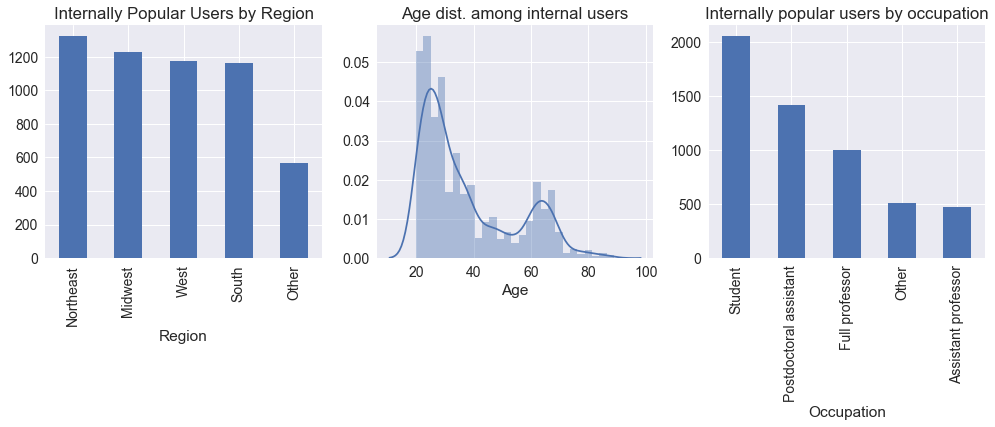

In [15]:
# Users popular internally

fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3, nrows=1, figsize=(15,4)) 
internal_visits_users.region.value_counts().plot('bar', ax=ax1)
ax1.set(title='Internally Popular Users by Region', xlabel='Region'); 

sns.distplot(internal_visits_users.age, ax=ax2)
ax2.set(xlabel='Age', title='Age dist. among internal users'); 

internal_visits_users.title.value_counts().plot('bar', ax=ax3)
ax3.set(xlabel='Occupation', title = 'Internally popular users by occupation') 


#### Find user id of external profile visits
Since no field exists to do the join, lets try by using the urls.

This would help us trace the data for external and internal visits together

In [16]:
# pd.merge(internal_visits_users, external_profile_views.drop('id', axis =1), left_on = 'profile_url', right_on = 'public_profile_url')
# only 2320 records match

# Remove -ms if there in public url and try to join again
exter_ms_removed = external_profile_views.copy()
exter_ms_removed.public_profile_url = external_profile_views.public_profile_url.map(lambda x: x[:-3] if x.endswith('-ms') else x)

inter_exter_merged_tmp = pd.merge(internal_visits_users, exter_ms_removed.drop('id', axis =1), left_on = 'profile_url', right_on = 'public_profile_url')
# 2953 matches=> still better
inter_exter_merged_tmp = inter_exter_merged_tmp.rename(columns = {'unique_PageViews': 'external_profile_visits'})
inter_exter_merged = inter_exter_merged_tmp[['user_id', 'internal_profile_visits', 'external_profile_visits', 'age', 'region', 'title']].reset_index()


In [17]:
inter_exter_merged['ext_gt_int'] = inter_exter_merged['external_profile_visits'] > inter_exter_merged['internal_profile_visits']

inter_exter_merged.pivot_table(index='title',columns='ext_gt_int', values='user_id', aggfunc='count')

ext_gt_int,False,True
title,,
Assistant professor,109,145
Full professor,315,255
Other,140,125
Postdoctoral assistant,374,395
Student,576,519


##### Clearly we see that Asst. Profs. have 1.4 times more external views than internal views, but students and full profs have less external views than internal views

# Q2
### a
Interesting trends:
> *Asst. Profs. have 1.4 times more external views than internal views, but students and full profs have less external views than internal views*


> *Students view profiles of Full professors the most, who are the most popular. This is followed by students viewing profiles of each other*



In [18]:
total_internal_visits = inter_exter_merged.internal_profile_visits.sum()
total_external_visits = inter_exter_merged.external_profile_visits.sum()

percent_internal_visits = float(total_internal_visits)/(total_internal_visits+total_external_visits) * 100

percent_internal_visits

30.800520663846402

31% of visits are internal and the rest is external.

##### There are more than twice external visitors than internal visitors
Assumption: We consider a similar profile url structure for internal and external visitors


# Q2
### b
Conclusion for choosing data sources:
> With the assumption that the profile urls follow a similar structure, around 31% visits are internal, and hence it makes sense to consider both visitors for ranking

# Q2
### c
Rank for profile views feature:

In [19]:
# Find total visits for a profile. This is the overall popularity of a profile.
# Assumption: The feature of ranking would be implemented primarily for users of the social network, hence we place 
# 1.5 times (arbitary) more weight on the internal visits than external.

inter_exter_merged['total_visits_metric'] = inter_exter_merged['external_profile_visits'] + 1.5 * inter_exter_merged['internal_profile_visits']

### Rank for external users. 
List of users when the visitor is an external visitor (or not logged in)

In [20]:
inter_exter_merged['external_rank'] = inter_exter_merged['total_visits_metric'].rank(ascending=False)

rank_views_top_10 = inter_exter_merged[['user_id' ,'external_rank']].sort_values('external_rank').head(10)
rank_views_top_10

,user_id,external_rank
1541,2185215,1.0
2314,3347844,2.0
979,1447014,3.0
137,165211,4.0
49,62285,5.0
1746,2460133,6.0
2548,3716355,7.0
179,218859,8.0
1890,2670622,9.0
2346,3400569,10.0


### Rank for internal users. 
List of users when the visitor is an internal visitor.
We want to make the result more personalized

Logic and Assumptions:
- If X viewed profile of Y, then suggest X to Y (they might be knowing each other)
- On Y's suggestion, Y should not appear


In [21]:
# For a given user_id, find all other who had visited his profile
# They should be given higher preference.

def getProfileSuggestion(user_id):
    internal_viewers = internal_profile_views.loc[internal_profile_views['viewed_user_id']==user_id]['user_id'].reset_index()
    
    mer = pd.merge(inter_exter_merged, internal_viewers, how = 'left', on = 'user_id')
    
    max_visit_metric = inter_exter_merged.total_visits_metric.max()
    
    def bias_internal_viewers(row): # The internal viewers should be ranked higher
        if row['index_y'] == row['index_y'] : # there was a match and the index_y is not null
            # this would bring them to the top, but keep the ordering as per their popularity
            return row['total_visits_metric'] + max_visit_metric
        else:
            return row['total_visits_metric']
    
    mer['biased_visits_metric']=mer.apply(bias_internal_viewers, axis =1) 
    mer['internal_rank'] = mer['biased_visits_metric'].rank(ascending=False)

    # Print the visitors to check
    # print mer[mer['index_y'] == mer['index_y']]
    
    
    # Filter yourself
    mer = mer[mer['user_id'] != user_id]

    return mer[['user_id', 'internal_rank']].sort_values('internal_rank').head(10)

getProfileSuggestion(user_id =107727)

,user_id,internal_rank
2055,2930973,1.0
144,178017,2.0
1541,2185215,3.0
2314,3347844,4.0
979,1447014,5.0
137,165211,6.0
49,62285,7.0
1746,2460133,8.0
2548,3716355,9.0
179,218859,10.0
